In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
from os import path
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
data_path ='data/federalreporter_deep_learning'

In [189]:
df = pd.read_csv(path.join(data_path, 'federalreporter_deep_learning_20200303.csv'), delimiter = '|', header=None,
                names =['Project Number', 'Title', 'Agency', 'PI', 'Univ','Country', 'Fiscal Year', 
                        'Total Cost','Start Year','End Year', 'Budget_Start_Year', 'Budget_End_Year' ],thousands=',')
df.shape

(1362, 12)

In [190]:
df.head()

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Budget_Start_Year,Budget_End_Year
0,1ZIACT000272-11,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2018,1041664.0,NaN,NaN,NaN,NaN
1,1ZIHCT000200-28,"INFORMATICS, MACHINE LEARNING & BIOMEDICAL DAT...",CIT,"JOHNSON, CALVIN A",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,2619784.0,NaN,NaN,NaN,NaN
2,1ZIACT000272-10,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,1007609.0,NaN,NaN,NaN,NaN
3,1ZIACT000272-09,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2016,847611.0,NaN,NaN,NaN,NaN
4,5U01LM012675-02,CROWD-ASSISTED DEEP LEARNING (CRADLE) DIGITAL ...,NLM,"HADLEY, DEXTER D",UNIVERSITY OF CALIFORNIA SAN FRANCISCO,UNITED STATES,2018,545116.0,01-Aug-2017,31-Jul-2021,01-Aug-2018,31-Jul-2019


## preprocess the data

### 1 change the time formate

In [191]:
from datetime import datetime

s1 = "20-Sep-2017"
d1 = datetime.strptime(s1, '%d-%b-%Y')
d2 = datetime.strptime('31-Aug-2020', '%d-%b-%Y')
delta = d2-d1
delta.days/365

d1.strftime('%Y-%m-%d')

'2017-09-20'

In [192]:
df['Start Year'] = pd.to_datetime(df['Start Year'])
df['End Year'] = pd.to_datetime(df['End Year'])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 12 columns):
Project Number       1362 non-null object
Title                1362 non-null object
Agency               1362 non-null object
PI                   1362 non-null object
Univ                 1362 non-null object
Country              1362 non-null object
Fiscal Year          1362 non-null int64
Total Cost           1361 non-null float64
Start Year           1177 non-null datetime64[ns]
End Year             1204 non-null datetime64[ns]
Budget_Start_Year    1292 non-null object
Budget_End_Year      1292 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 127.8+ KB


In [194]:
(df['End Year'] - df['Start Year']).astype('timedelta64[h]')

0           NaN
1           NaN
2           NaN
3           NaN
4       35040.0
         ...   
1357        NaN
1358        NaN
1359        NaN
1360    46032.0
1361    35040.0
Length: 1362, dtype: float64

In [195]:
df['Delta_years'] = round((df['End Year'] - df['Start Year']).astype('timedelta64[D]')/365)
df.head()

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Budget_Start_Year,Budget_End_Year,Delta_years
0,1ZIACT000272-11,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2018,1041664.0,NaT,NaT,NaN,NaN,NaN
1,1ZIHCT000200-28,"INFORMATICS, MACHINE LEARNING & BIOMEDICAL DAT...",CIT,"JOHNSON, CALVIN A",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,2619784.0,NaT,NaT,NaN,NaN,NaN
2,1ZIACT000272-10,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,1007609.0,NaT,NaT,NaN,NaN,NaN
3,1ZIACT000272-09,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2016,847611.0,NaT,NaT,NaN,NaN,NaN
4,5U01LM012675-02,CROWD-ASSISTED DEEP LEARNING (CRADLE) DIGITAL ...,NLM,"HADLEY, DEXTER D",UNIVERSITY OF CALIFORNIA SAN FRANCISCO,UNITED STATES,2018,545116.0,2017-08-01,2021-07-31,01-Aug-2018,31-Jul-2019,4.0


In [196]:
df['Fiscal Year'].unique()

array([2018, 2017, 2016, 2015])

In [197]:
def correct_years(x):
    if x['Delta_years']>5:
        f = pd.to_datetime(x['Fiscal Year'],format='%Y')
        t = x['End Year']
        delta = round((t - f).days/365)
        x['Delta_years'] = delta
    return x
    
df = df.apply(correct_years, axis=1)

In [198]:
df[df['Delta_years']>5].head(10)

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Budget_Start_Year,Budget_End_Year,Delta_years
270,2R01DC010915-06A1,BASAL FOREBRAIN MODULATION OF OLFACTORY BULB F...,NIDCD,"SHIPLEY, MICHAEL THOMAS",UNIVERSITY OF MARYLAND BALTIMORE,UNITED STATES,2018,644112.0,2011-02-01,2023-08-31,14-Sep-2018,31-Aug-2019,6.0
402,2R01NS084017-06A1,MECHANISMS OF MEMORY ENHANCEMENT BY DEEP BRAIN...,NINDS,"FRIED, ITZHAK",UNIVERSITY OF CALIFORNIA LOS ANGELES,UNITED STATES,2018,601971.0,2013-06-01,2023-08-31,30-Sep-2018,31-Aug-2019,6.0
879,1UH3NS100548-01,COMBINED CORTICAL AND SUBCORTICAL RECORDIN...,NINDS,"DOUGHERTY, DARIN D",MASSACHUSETTS GENERAL HOSPITAL,UNITED STATES,2016,623218.0,2016-09-30,2022-12-29,30-Sep-2016,29-Dec-2018,7.0
1201,2R24AI072073-11,IMMGEN: GENE EXPRESSION AND REGULATION IN IMMU...,NIAID,"BENOIST, CHRISTOPHE O.",HARVARD UNIVERSITY,UNITED STATES,2017,1727457.0,2007-09-18,2022-08-31,01-Sep-2017,31-Aug-2018,6.0
1203,2P01AI089618-06,STRUCTURE-FUNCTION ANALYSIS OF INFECTION- AND ...,NIAID,"HARRISON, STEPHEN COPLAN",CHILDREN'S HOSPITAL BOSTON,UNITED STATES,2017,2637545.0,2011-08-01,2022-07-31,01-Aug-2017,31-Jul-2018,6.0
1204,2T32AI007422-26,MOLECULAR ANALYSIS OF MICROBIAL PATHOGENS,NIAID,"ISBERG, RALPH R.",TUFTS UNIVERSITY BOSTON,UNITED STATES,2017,211429.0,1992-09-30,2022-08-31,01-Sep-2017,31-Aug-2018,6.0


In [199]:
import re

text = '1K01LM012734-01'

m = re.search('[A-Za-z]\d{2}', text)
if m:
    found = m.group(0)
    print(found)

K01


In [200]:
import re
def extract_ptype(x):
    text = x['Project Number']
    m = re.search('[A-Za-z]\d{2}', text)
    if m:
        found = m.group(0)
#         print(found)
        x['Project Type'] = found
    return x
    
df = df.apply(extract_ptype, axis=1)
df.head()

,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Budget_Start_Year,Budget_End_Year,Delta_years,Project Type
0,1ZIACT000272-11,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2018,1041664.0,NaT,NaT,NaN,NaN,NaN,T00
1,1ZIHCT000200-28,"INFORMATICS, MACHINE LEARNING & BIOMEDICAL DAT...",CIT,"JOHNSON, CALVIN A",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,2619784.0,NaT,NaT,NaN,NaN,NaN,T00
2,1ZIACT000272-10,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,1007609.0,NaT,NaT,NaN,NaN,NaN,T00
3,1ZIACT000272-09,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2016,847611.0,NaT,NaT,NaN,NaN,NaN,T00
4,5U01LM012675-02,CROWD-ASSISTED DEEP LEARNING (CRADLE) DIGITAL ...,NLM,"HADLEY, DEXTER D",UNIVERSITY OF CALIFORNIA SAN FRANCISCO,UNITED STATES,2018,545116.0,2017-08-01,2021-07-31,01-Aug-2018,31-Jul-2019,4.0,U01


In [201]:
df1 = df
df2 = pd.read_csv('data/processed_NIH.csv') #keyword with machine learning
print(df2.shape)
print("duplicate", df1.merge(df2, on='Project Number').shape)
df = pd.concat([df1,df2], axis=0,sort=False).drop_duplicates(['Project Number']).reset_index(drop=True)
print(df.shape)
df.head()

(4774, 12)
duplicate (400, 25)
(5736, 14)


,Project Number,Title,Agency,PI,Univ,Country,Fiscal Year,Total Cost,Start Year,End Year,Budget_Start_Year,Budget_End_Year,Delta_years,Project Type
0,1ZIACT000272-11,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2018,1041664.0,NaT,NaT,NaN,NaN,NaN,T00
1,1ZIHCT000200-28,"INFORMATICS, MACHINE LEARNING & BIOMEDICAL DAT...",CIT,"JOHNSON, CALVIN A",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,2619784.0,NaT,NaT,NaN,NaN,NaN,T00
2,1ZIACT000272-10,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2017,1007609.0,NaT,NaT,NaN,NaN,NaN,T00
3,1ZIACT000272-09,BIOMEDICAL IMAGE ANALYSIS AND INFORMATICS,CIT,"MCAULIFFE, MATTHEW",NATIONAL INSTITUTES OF HEALTH,UNITED STATES,2016,847611.0,NaT,NaT,NaN,NaN,NaN,T00
4,5U01LM012675-02,CROWD-ASSISTED DEEP LEARNING (CRADLE) DIGITAL ...,NLM,"HADLEY, DEXTER D",UNIVERSITY OF CALIFORNIA SAN FRANCISCO,UNITED STATES,2018,545116.0,2017-08-01 00:00:00,2021-07-31 00:00:00,01-Aug-2018,31-Jul-2019,4.0,U01


In [202]:
df.to_csv(path.join('data/', 'processed_NIH_ML_DL.csv'), index=None)

## analysis the data

In [203]:
# read the data
df = pd.read_csv(path.join('data', 'processed_NIH_ML_DL.csv'))
df.shape

(5736, 14)

In [228]:
len(df['Project Number'].unique())

5736

In [229]:
df[df.Agency=='NIMH'].shape

(670, 14)

In [205]:
output_path ='data/statistics_for_plot_ML_DL'

In [237]:
# The top 10 funded agency
df_agency_by_year = df.groupby(['Agency','Fiscal Year'])['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['Fiscal Year','Agency'], ascending=True)
df_agency_by_year['Fiscal Year'] = pd.to_datetime(df_agency['Fiscal Year'],format='%Y')
# df_agency.to_csv(path.join(output_path, 'agency_count_by_year.csv'), index=None)
df_agency_by_year[:10]

,Agency,Fiscal Year,count
0,CIT,2014-01-01,4
11,NCATS,2014-01-01,1
20,NCI,2014-01-01,69
25,NEI,2014-01-01,21
30,NHGRI,2014-01-01,27
35,NHLBI,2014-01-01,28
40,NIA,2014-01-01,24
45,NIAAA,2014-01-01,9
50,NIAID,2014-01-01,30
55,NIAMS,2014-01-01,5


In [241]:
df_agency_by_year.[-30:]

,Agency,Fiscal Year,count
117,NINR,2017-01-01,10
122,NLM,2017-01-01,45
127,OD,2017-01-01,21
4,CIT,2018-01-01,4
7,CLC,2018-01-01,2
10,FIC,2018-01-01,1
15,NCATS,2018-01-01,26
19,NCCIH,2018-01-01,10
24,NCI,2018-01-01,209
29,NEI,2018-01-01,26


In [207]:
df_agency.rename({'Agency': 'name', 'Fiscal Year': 'date', 'count': 'value'}, axis=1, inplace=True)
df_agency['category'] = df_agency['name'] 
df_agency.to_csv(path.join(output_path, 'agency_count_by_year.csv'), index=None)

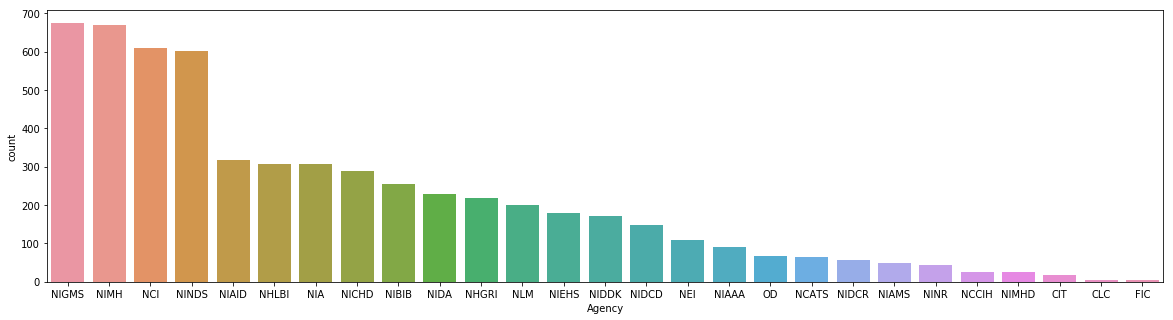

In [234]:
plt.figure(figsize=(20,5))
df_agency = df.groupby(['Agency'])['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
sns.barplot(x='Agency', y='count', data=df_agency)

In [235]:
df_agency['percent']=df_agency['count']/df_agency['count'].sum()*100
df_agency.head()

,Agency,count,percent
20,NIGMS,675,11.767782
21,NIMH,670,11.680614
5,NCI,609,10.617155
23,NINDS,603,10.512552
11,NIAID,317,5.526499


In [232]:
df_agency = df.groupby(['Agency','Fiscal Year'])['Total Cost'].sum()\
                             .reset_index(name='Total Cost') \
                             .sort_values(['Fiscal Year','Agency'], ascending=True)
df_agency['Fiscal Year'] = pd.to_datetime(df_agency['Fiscal Year'],format='%Y')
df_agency['Total Cost'] = df_agency['Total Cost']
df_agency.rename({'Total Cost': 'Total Cost (millon)'}, axis=1, inplace=True)
df_agency[:10]

,Agency,Fiscal Year,Total Cost (millon)
0,CIT,2014-01-01,3414620.0
11,NCATS,2014-01-01,2020212.0
20,NCI,2014-01-01,29324646.0
25,NEI,2014-01-01,10952945.0
30,NHGRI,2014-01-01,19824907.0
35,NHLBI,2014-01-01,18252038.0
40,NIA,2014-01-01,9660211.0
45,NIAAA,2014-01-01,3748263.0
50,NIAID,2014-01-01,14455742.0
55,NIAMS,2014-01-01,1318778.0


In [212]:
df_agency.rename({'Agency': 'name', 'Fiscal Year': 'date', 'Total Cost (millon)': 'value'}, axis=1, inplace=True)
df_agency['category'] = df_agency['name'] 
df_agency.to_csv(path.join(output_path, 'agency_cost_by_year.csv'), index=None)

In [213]:

df_year = df.groupby('Fiscal Year')['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
df_year[:10]
df_year.to_csv(path.join(output_path, 'project_count_by_FY.csv'), index=None)

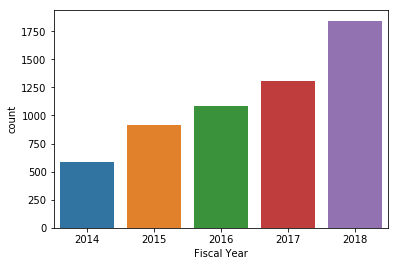

In [214]:
ax = sns.barplot(x='Fiscal Year', y='count', data=df_year)

In [215]:
df_type = df.groupby('Project Type')['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
df_type[:10]

,Project Type,count
66,R01,2177
70,R21,346
99,U01,255
105,U54,195
29,K01,176
63,P50,160
60,P30,145
58,P01,134
65,R00,129
79,R43,117


In [216]:
df_type[:15].to_csv(path.join(output_path, 'project_count_by_type.csv'), index=None)

In [217]:
df_type['Project Type'].unique()

array(['R01', 'R21', 'U01', 'U54', 'K01', 'P50', 'P30', 'P01', 'R00',
       'R43', 'K23', 'R44', 'R25', 'F31', 'F32', 'U19', 'K99', 'T32',
       'R03', 'U24', 'K08', 'R56', 'F30', 'R24', 'G00', 'R35', 'H00',
       'R41', 'P41', 'R13', 'K24', 'K02', 'R33', 'T00', 'K25', 'U41',
       'S10', 'P20', 'R15', 'S00', 'R42', 'A00', 'D00', 'L00', 'R37',
       'M01', 'D01', 'C01', 'K22', 'R34', 'M00', 'M11', 'A20', 'D02',
       'K07', 'M09', 'F99', 'M20', 'G05', 'T15', 'K12', 'T90', 'R90',
       'A23', 'S04', 'S02', 'S03', 'Y00', 'H11', 'K11', 'B02', 'P42',
       'R61', 'P60', 'L13', 'K04', 'G01', 'I00', 'K00', 'M10', 'K18',
       'L04', 'L14', 'S06', 'G20', 'K10', 'B00', 'S08', 'M12', 'K76',
       'K43', 'T34', 'U44', 'M13', 'C00', 'A22', 'U18', 'D08', 'S16',
       'G04', 'G06', 'S11', 'H09', 'L06', 'I13', 'A04', 'S09'],
      dtype=object)

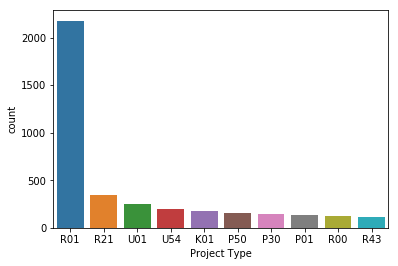

In [218]:
ax = sns.barplot(x='Project Type', y='count', data=df_type[:10])

In [242]:
# The top 10 funded agency
df_univ = df.groupby('Univ')['Project Number'].count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
df_univ['Univ']= df_univ['Univ'].str.lower()
df_univ['Percent'] = df_univ['count']/df.shape[0]*100
df_univ[:20]

,Univ,count,Percent
233,national institutes of health,237,4.131799
355,stanford university,230,4.009763
375,the university of pittsburgh,180,3.138075
397,university of california los angeles,145,2.527894
400,university of california san diego,133,2.318689
473,university of wisconsin madison,130,2.266388
449,university of pennsylvania,117,2.039749
432,university of michigan at ann arbor,114,1.987448
153,harvard university,114,1.987448
472,university of washington,107,1.865411


In [231]:
df[df['Univ'].str.lower()=='national institutes of health'].shape

(237, 14)

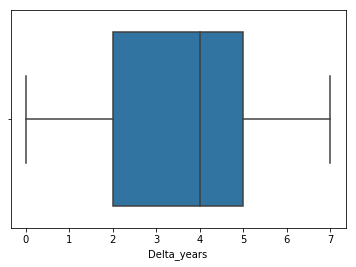

In [221]:
sns.boxplot(df['Delta_years'])

In [222]:
df['Delta_years'].median()

4.0

In [223]:
df['Delta_years'].mean()

3.5639723801787166

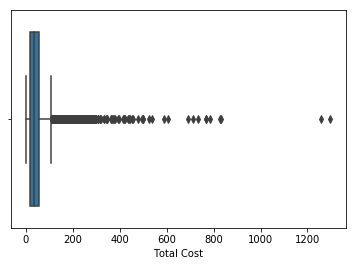

In [224]:
sns.boxplot(df['Total Cost']/10000)

In [225]:
df['Total Cost'].mean()/10000

48.063168801256325

In [226]:
df['Total Cost'].mean()

480631.6880125633